In [ ]:
!pip install spotipy

Accuracy with Decision Tree:  0.8571428571428571
Confusion Matrix:
 [[7 1]
 [1 5]]
Recall Score:  0.8333333333333334
Precision Score:  0.8333333333333334
Test set score:0.86
--------------------------------------------------------------------------------
[[6 2]
 [2 4]]
Accuracy with KNN:  0.7142857142857143
Confusion Matrix:
 [[6 2]
 [2 4]]
Recall Score:  0.6666666666666666
Precision Score:  0.6666666666666666
Test set score:0.71
--------------------------------------------------------------------------------
Accuracy with Logistic Regression: 0.6428571428571429
Confusion Matrix:
 [[4 4]
 [1 5]]
Recall Score:  0.8333333333333334
Precision Score:  0.5555555555555556
Test set score:0.64
--------------------------------------------------------------------------------
C best value
5


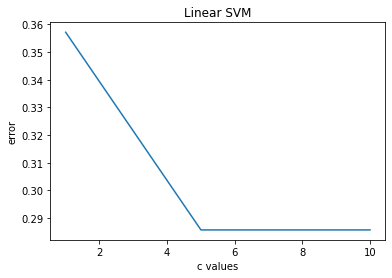

Accuracy with Linear SVM: 0.7142857142857143
Confusion Matrix:
 [[5 3]
 [1 5]]
Recall Score:  0.8333333333333334
Precision Score:  0.625
Test set score:0.71
--------------------------------------------------------------------------------
Accuracy with Polynomial SVM: 0.7142857142857143
Confusion Matrix:
 [[4 4]
 [1 5]]
Recall Score:  0.8333333333333334
Precision Score:  0.5555555555555556
Test set score:0.64
--------------------------------------------------------------------------------


In [ ]:
import spotipy
import spotipy.util as util
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.svm as svm
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

class Spotipy:

    def __init__(self, cid, secret, user, liked, no_liked):
        self.cid = cid
        self.secret = secret
        self.user = user
        self.manager = SpotifyClientCredentials(client_id=self.cid, client_secret=self.secret)
        self.sp = spotipy.Spotify(client_credentials_manager=self.manager)
        self.liked_features = self.get_features(self.get_playlist_URIs(user, liked))
        self.no_liked_features = self.get_features(self.get_playlist_URIs(user, no_liked))

    def get_playlist_tracks(self, user, pid):
        tracks_list = []
        results = self.sp.user_playlist(user, pid,
                                        fields="tracks,next")
        tracks = results['tracks']
        while tracks:
            tracks_list += [item['track'] for (i, item) in
                            enumerate(tracks['items'])]
            tracks = self.sp.next(tracks)
        return tracks_list

    def get_playlist_URIs(self, user, pid):
        return [t["uri"] for t in self.get_playlist_tracks(user, pid)]

    def get_features(self, track_URIs):
        features = []
        for pack in range(len(track_URIs)):
            features = features + (self.sp.audio_features(track_URIs[pack]))
        df = pd.DataFrame.from_dict(features)
        df["uri"] = track_URIs
        return df


def main():
    liked = 'spotify:playlist:6jiezpUk5W7Jc6cINk8T24'
    no_liked = 'spotify:playlist:6XILrakxW3jtaha9OCJ636'

    sp = Spotipy(cid='2074ccfa6bb04d60a2965edaa32d3d88', secret='f59591f61f56452387f22bd789ac855a', user='dawnprisms',
                 liked=liked, no_liked=no_liked)

    list_ones = [1] * len(sp.liked_features)
    list_zeros = [0] * len(sp.no_liked_features)
    sp.liked_features.insert(0, 'target', list_ones)
    sp.no_liked_features.insert(0, 'target', list_zeros)

    training_data = pd.concat([sp.liked_features, sp.no_liked_features], axis=0, join='outer', ignore_index=True)

    features = ['tempo', 'acousticness', 'energy', 'instrumentalness', 'speechiness']

    train, test = train_test_split(training_data, test_size=0.2)
    x_train = train[features]
    y_train = train['target']
    x_test = test[features]
    y_test = test['target']

    #######
    #Decision Tree Classifier############################################
    #####################################################################
    dtc = DecisionTreeClassifier()
    dt = dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    print('Accuracy with Decision Tree: ', score)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Test set score:{:.2f}".format(dtc.score(x_test,y_test)))
    

    #plt.plot(sp.liked_features[['tempo']])
    #plt.show()

    print(80 * "-")
    #######
    #KNN#################################################################
    #####################################################################
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(x_train,y_train)
    y_pred_knn= knn.predict(x_test)
    score = accuracy_score(y_test,y_pred_knn) 
    print(confusion_matrix(y_test, y_pred_knn))
    print('Accuracy with KNN: ', score)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
    print("Recall Score: ", recall_score(y_test, y_pred_knn))
    print("Precision Score: ", precision_score(y_test, y_pred_knn))
    print("Test set score:{:.2f}".format(knn.score(x_test,y_test)))

    print(80 * "-")
    #######
    #Logistic Regression#################################################
    #####################################################################
    logisticRegr = LogisticRegression()
    logisticRegr.fit(x_train, y_train)
    y_pred_lr = logisticRegr.predict(x_test)
    score = accuracy_score(y_test, y_pred_lr)
    print("Accuracy with Logistic Regression:", score)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
    print("Recall Score: ", recall_score(y_test, y_pred_lr))
    print("Precision Score: ", precision_score(y_test, y_pred_lr))

    print("Test set score:{:.2f}".format(logisticRegr.score(x_test, y_test)))

    print(80 * "-")

    #######
    #SVM#################################################################
    #SVM linear##########################################################
    #x_train=[]
    x_validation=[]
    #y_train=[]
    y_validation=[]
    flag=0
    counter=0   

    least_error=1000
    c_best=1
    model_best = 'linear'


    c_range = [1,5,10]#
    # Testing different Hyper-parameter with C in Linear svm model
    svm_c_error = []
    for c_value in c_range:
       svm_model = svm.SVC(kernel='linear', C=c_value)
       svm_model.fit(X=x_train, y=y_train)
       error = 1. - svm_model.score(x_test, y_test)
       svm_c_error.append(error)
       if error < least_error:
            least_error=error
            c_best=c_value
    
    svm_model = svm.SVC(kernel='linear', C=c_best)
    svm_model.fit(X=x_train, y=y_train)
    print("C best value")
    print(c_best)            

    plt.plot(c_range, svm_c_error)
    plt.title('Linear SVM')
    plt.xlabel('c values')
    plt.ylabel('error')    
    plt.show()
    y_pred_svm =  svm_model.predict(x_test)

    score = accuracy_score(y_test, y_pred_svm)
    print("Accuracy with Linear SVM:", score)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
    print("Recall Score: ", recall_score(y_test, y_pred_svm))
    print("Precision Score: ", precision_score(y_test, y_pred_svm))
    print("Test set score:{:.2f}".format( svm_model.score(x_test, y_test)))
    
    print(80 * "-")
    #END  SVM linear##########################################################
    #########################################################

    #svm polynomial default
   
    svm_model = svm.SVC(kernel='poly', C=c_value)#defaul of poly with degree of 3
    svm_model.fit(X=x_train, y=y_train)
    y_pred_psvm =  svm_model.predict(x_test)
    #score = accuracy_score(y_test, y_pred_svm)
    print("Accuracy with Polynomial SVM:", score)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_psvm))
    print("Recall Score: ", recall_score(y_test, y_pred_psvm))
    print("Precision Score: ", precision_score(y_test, y_pred_psvm))
    print("Test set score:{:.2f}".format( svm_model.score(x_test, y_test)))

    #END svm polynomial degree 3###############################
    #SVM ##########################################################

    print(80 * '-')

    dt_recall = recall_score(y_test, y_pred)
    lr_recall = recall_score(y_test, y_pred_lr)
    knn_recall = recall_score(y_test, y_pred_knn)
    svm_recall = recall_score(y_test, y_pred_svm)
    x = np.array([dt_recall, lr_recall, knn_recall, svm_recall])
    plt.plot(x)

    dt_accuracy = accuracy_score(y_test, y_pred)
    lr_accuracy = accuracy_score(y_test, y_pred_lr)
    knn_accuracy = accuracy_score(y_test, y_pred_knn)
    svm_accuracy = accuracy_score(y_test, y_pred_svm)
    x = np.array([dt_accuracy, lr_accuracy, knn_accuracy, svm_accuracy])
    plt.plot(x)

    dt_precision = precision_score(y_test, y_pred)
    lr_precision = precision_score(y_test, y_pred_lr)
    knn_precision = precision_score(y_test, y_pred_knn)
    svm_precision = precision_score(y_test, y_pred_svm)
    x = np.array([dt_precision, lr_precision, knn_precision, svm_precision])

    x_ticks = ['Decision Tree', 'Logistic Regression', 'KNN', 'SVM']
    plt.plot(x_ticks,x)
    plt.title("Evaluation Metrics")
    plt.legend(["Recall", "Accuracy", "Precision"])


if __name__ == '__main__':
    main()
